# Восканян Юрий, КИ22-17/1б
## Практическая работа №2
## Тема: Предварительная обработка данных

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import sigmaclip
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

In [43]:
data = pd.read_excel('first_practice_dataframe.xlsx', 
                     usecols=['cat5_customerSatisfaction', 'cat1_gender', 'num1_10', 'num2_10', 'num3_10'])

data['cat5_customerSatisfaction'] = data['cat5_customerSatisfaction'].replace('good', 'Good')
data['cat5_customerSatisfaction'] = data['cat5_customerSatisfaction'].replace('poor', 'Poor')

data['cat1_gender'] = data['cat1_gender'].replace('male', 'Male')
data['cat1_gender'] = data['cat1_gender'].replace('female', 'Female')


# Задание 1. Визуальный анализ исходных данных

In [44]:
# Качественные переменные
qualitative_variables = [
    data['cat5_customerSatisfaction'],
    data['cat1_gender']
]
# Количественные переменные
quantitative_variables = [
    data['num1_10'],
    data['num2_10'],
    data['num3_10']
]


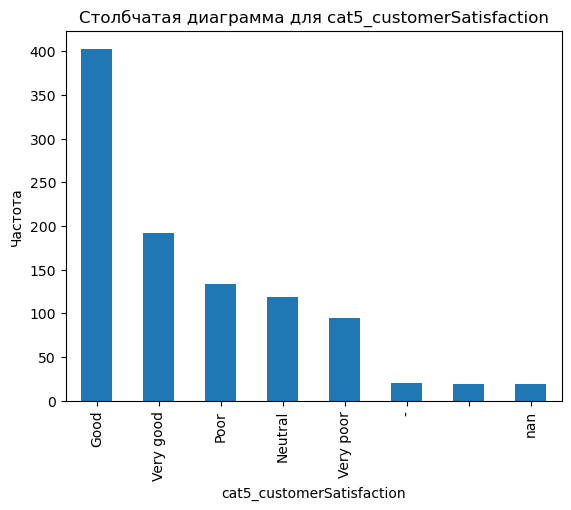

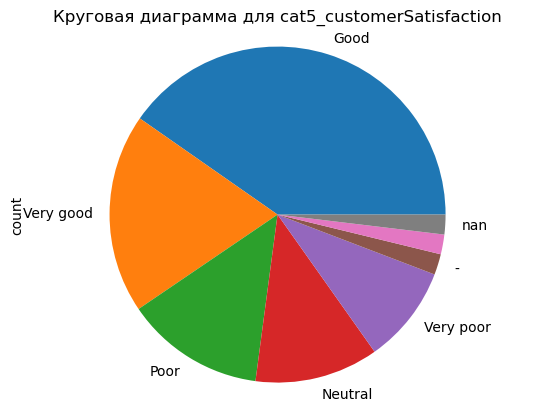

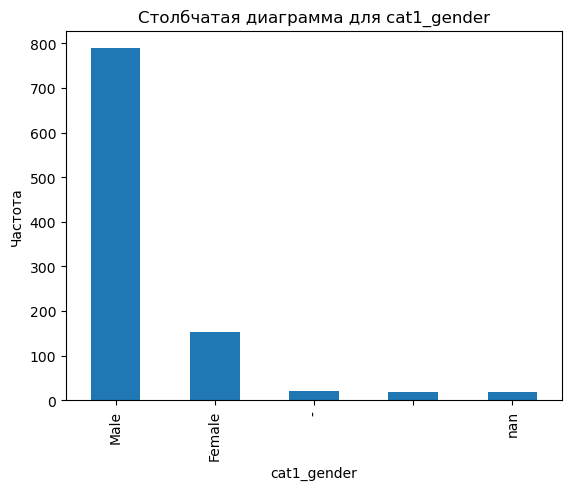

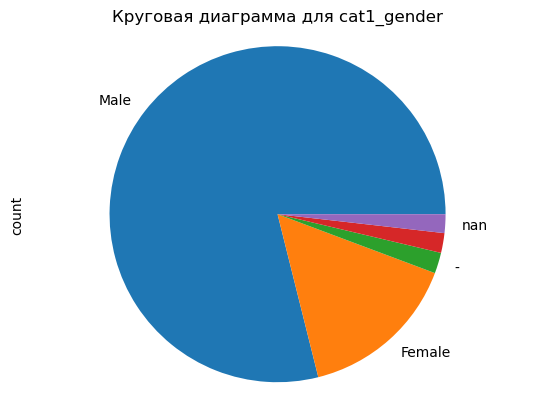

In [45]:

# построение столбчатой и круговой диаграммы для качественных переменных
for column in qualitative_variables:
    # столбчатая
    column.value_counts(dropna=False).plot(kind='bar', title=f'Столбчатая диаграмма для {column.name}')
    plt.xlabel(column.name)
    plt.ylabel('Частота')
    plt.show()
    # круговая
    column.value_counts(dropna=False).plot(kind='pie',  title=f'Круговая диаграмма для {column.name}')
    # Для сохранения формы круга
    plt.axis('equal')  
    plt.show()
    


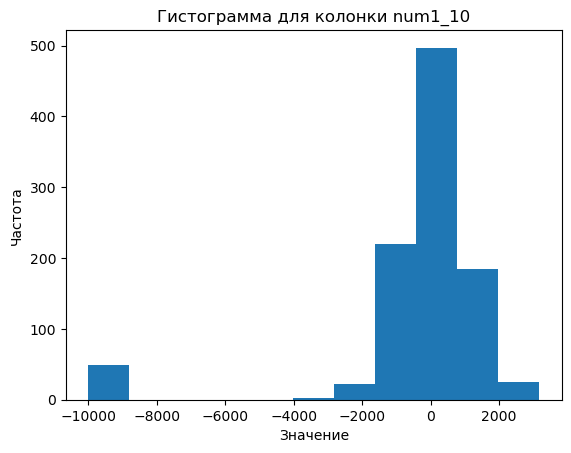

c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


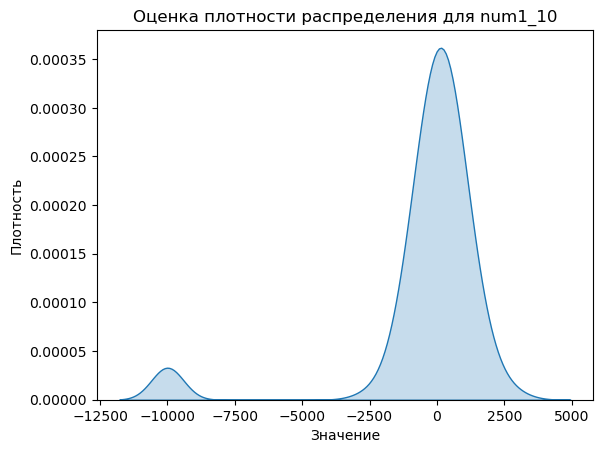

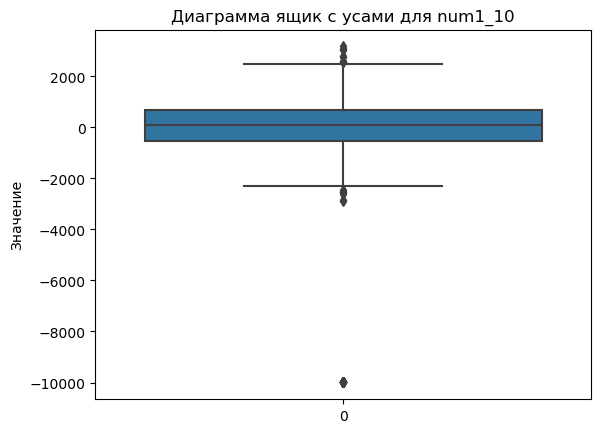

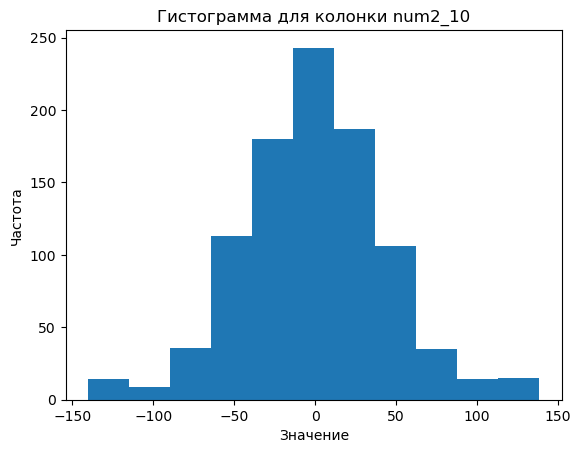

c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


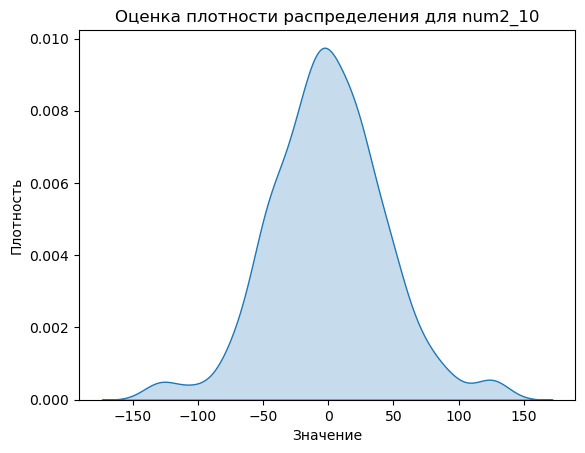

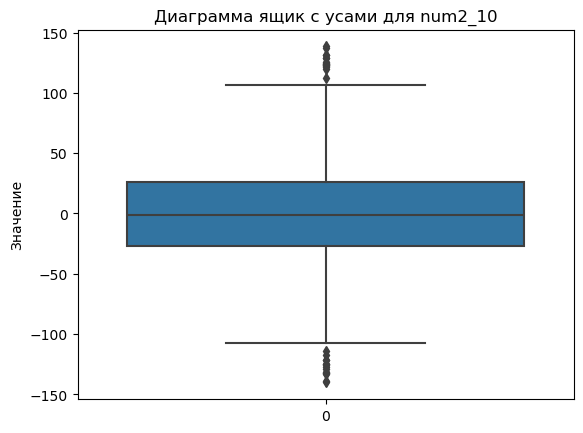

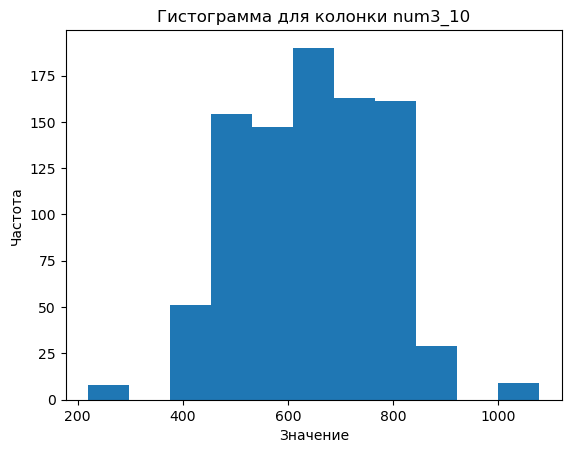

c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


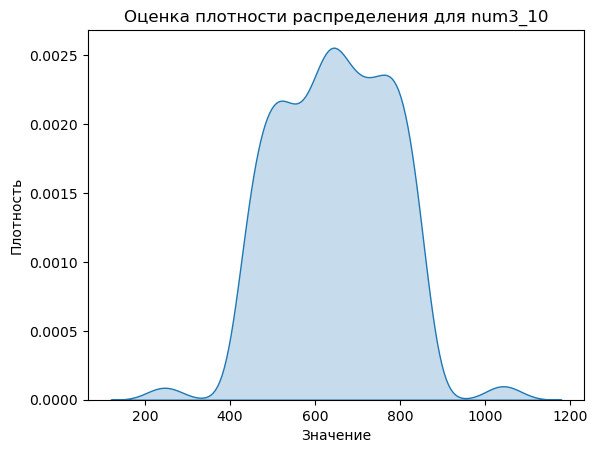

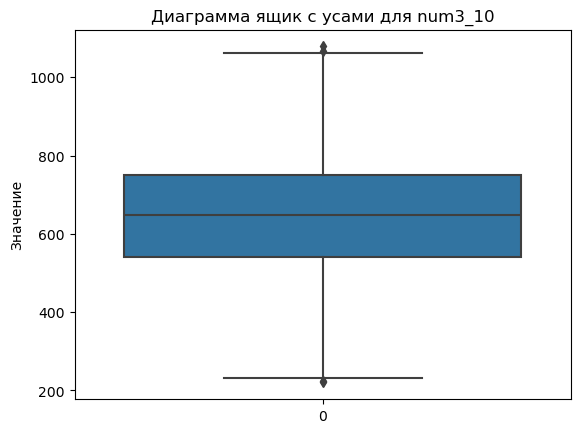

In [46]:
# Построение гистограммы, диаграммы "ящик с усами" и оценка плотности распределения 
for column in quantitative_variables:
    # Определение количества интервалов по правилу стёрджеса
    # bins = 1 + np.log2(column.size) = 11

    # Замена пустых строк и символа "-" на NaN
    column = pd.to_numeric(column, errors='coerce')
    
    # построение гистограммы
    column.plot.hist(bins=11)
    plt.title(f'Гистограмма для колонки {column.name}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()
    
    # Оценка плотности распределения
    sns.kdeplot(column, fill=True)
    plt.title(f'Оценка плотности распределения для {column.name}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.show()

    # Ящик с усами
    sns.boxplot(column)
    plt.title(f'Диаграмма ящик с усами для {column.name}')
    plt.ylabel('Значение')
    plt.show()
        


# Задание 2. Поиск аномальных значений

In [47]:
# Проверка типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cat1_gender                982 non-null    object 
 1   cat5_customerSatisfaction  981 non-null    object 
 2   num1_10                    1000 non-null   float64
 3   num2_10                    952 non-null    float64
 4   num3_10                    970 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


### По данным видно, что один из столбцов, который должны иметь тип float64, имеет тип object. Изменим его тип

In [49]:
data['num3_10'] = pd.to_numeric(data['num3_10'], errors='coerce')

In [19]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cat1_gender                982 non-null    object 
 1   cat5_customerSatisfaction  981 non-null    object 
 2   num1_10                    1000 non-null   float64
 3   num2_10                    952 non-null    float64
 4   num3_10                    912 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


#### Пропуски

In [20]:
data.isnull().sum()

cat1_gender                  18
cat5_customerSatisfaction    19
num1_10                       0
num2_10                      48
num3_10                      88
dtype: int64

# Задание 3. Поиск аномальных значении

In [50]:
def quartile_method(data, column_name):
    q1 = data[column_name].dropna().quantile(0.25)
    q3 = data[column_name].dropna().quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

def sigma_method(data, column, sigma=3):
    data_filtered = data[column].dropna()  
    data_sigma_clipped, _, _ = sigmaclip(data_filtered, sigma, sigma)
    return data[~data[column].isin(data_sigma_clipped)]

# Теперь получаем индексы строк, где имеются выбросы
# 'num1_10'
# 'num2_10'
# 'num3_10'

outliers_index_iqr_1 = quartile_method(data, 'num1_10').index
outliers_index_sigma_1 = sigma_method(data, 'num1_10').index

outliers_index_iqr_2 = quartile_method(data, 'num2_10').index
outliers_index_sigma_2 = sigma_method(data, 'num2_10').index

outliers_index_iqr_3 = quartile_method(data, 'num3_10').index
outliers_index_sigma_3 = sigma_method(data, 'num3_10').index

data['num2_10'] = data['num2_10'].fillna(data['num2_10'].mean())
data['num3_10'] = data['num3_10'].fillna(data['num3_10'].mean())


# Объединение индексов выбросов
outliers_index = (
    outliers_index_iqr_1.union(outliers_index_sigma_1)
    .union(outliers_index_sigma_2)
    .union(outliers_index_sigma_3)
)

# Удаление строк с найденными выбросами из исходного набора данных
data = data.drop(outliers_index)
# Замена обратно на пропущенные значения
data = data.replace(data['num2_10'].mean(), np.nan)
data = data.replace(data['num3_10'].mean(), np.nan)


# Задание 4. Поиск и восстановление пропущенных значений

In [51]:
data.replace(' ', np.nan, inplace=True)


label_encoder = LabelEncoder()
imputer = KNNImputer(n_neighbors=5)

# Избавление от пропусков методом K-ближайших соседей для первого признака
encoded_data = label_encoder.fit_transform(data.iloc[:, 0])
encoded_data = encoded_data.reshape(-1, 1)
imputed_data = imputer.fit_transform(encoded_data)
data.iloc[:, 0] = imputed_data
data.iloc[:, 0] = data.iloc[: , 0].astype(int)

# Избавление от пропусков заменой популярного значения для второго признака
most_common_value = data.iloc[:, 1].value_counts().idxmax()
data.fillna({data.columns[1]: most_common_value}, inplace=True)

# Избавление от пропусков заменой среднего значения для третьего признака
mean_value = data.iloc[:, 2].mean()
data.fillna({data.columns[2]: mean_value}, inplace=True)

# Избавление от пропусков заменой медианы для четвёртого признака
median_value = data.iloc[:, 3].median()
data.fillna({data.columns[3]: median_value}, inplace=True)

# Избавление от пропусков методом K-ближайших соседей для пятого признака
data.iloc[:, 4] = imputer.fit_transform(data.iloc[:, 4].values.reshape(-1, 1))

print("Пропуски каждого признака")
print(data.isnull().sum())




Пропуски каждого признака
cat1_gender                  0
cat5_customerSatisfaction    0
num1_10                      0
num2_10                      0
num3_10                      0
dtype: int64


# Задание 5. Преобразование данных

In [52]:
# Стандартизация числовых признаков
scaler = StandardScaler()
# x = (x - mean)/std
data[['num1_10', 'num2_10', 'num3_10']] = scaler.fit_transform(data[['num1_10', 'num2_10', 'num3_10']])

# 'num1_10'
# 'num2_10'
# 'num3_10'

# Нормализация числовых признаков
scaler = MinMaxScaler()
# x = (x-xmin)/(xmax-xmin)
data[['num1_10', 'num2_10', 'num3_10']] = scaler.fit_transform(data[['num1_10', 'num2_10', 'num3_10']])

# Применение one-hot encoding к первому категориальному столбцу
encoder = OneHotEncoder()
encoded_categories = encoder.fit_transform(data[['cat1_gender']])
encoded_df = pd.DataFrame(encoded_categories.toarray(), columns=encoder.get_feature_names_out(['cat1_gender']))
data = pd.concat([data, encoded_df], axis=1)

# cat5_customerSatisfaction
# cat1_gender

# Label encoding для категориального признака второго
label_encoder = LabelEncoder()
data['cat5_customerSatisfaction'] = label_encoder.fit_transform(data['cat5_customerSatisfaction'])
data.head() 

,cat1_gender,cat5_customerSatisfaction,num1_10,num2_10,num3_10,cat1_gender_0,cat1_gender_1,cat1_gender_2,cat1_gender_3
1,2,1,0.532217,0.570483,0.458574,0.0,0.0,0.0,1.0
3,3,4,0.636253,0.232658,0.641257,0.0,0.0,1.0,0.0
4,2,4,0.460831,0.553486,0.724823,0.0,0.0,1.0,0.0
6,2,2,0.159362,0.467157,0.177360,0.0,0.0,0.0,1.0
7,2,0,0.470089,0.397485,0.425839,0.0,1.0,0.0,0.0
